In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

In [3]:
df = pd.read_csv("./data/winequality-red.csv")

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
feature_count = df.shape[1] - 1
rows_list = []
for i in range(len(df)):
    new_row = np.array(df.iloc[i,0:feature_count])
    rows_list.append(new_row)
    
x = np.array(rows_list)
y = np.array(df.iloc[:,feature_count])
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [6]:
n = len(y)
randy = np.random.default_rng()
idx = np.arange(n)
randy.shuffle(idx)

## Splits the data into 80% training and 20% validation
train_idx = idx[:int(n*.8)]
val_idx = idx[int(n*.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

training_lenth = len(x_train)
validation_length = len(x_val)
print(f"The training data has {training_lenth} observations.")
print(f"The validation data has {validation_length} observations.")

The training data has 1279 observations.
The validation data has 320 observations.


In [7]:
sns.set_theme(palette="flare")
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

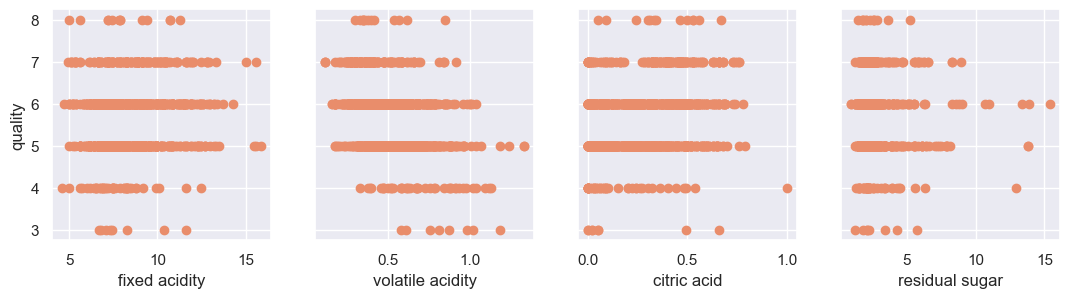

In [8]:
## plots the data from the first four features in side by side graphs
columns = df.columns.tolist()
x_features = columns[:feature_count]
y_feature = columns[feature_count]

fig, ax=plt.subplots(1,4,  figsize=(13,3),  sharey=True)

for i in range(4):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel(y_feature)
plt.show()

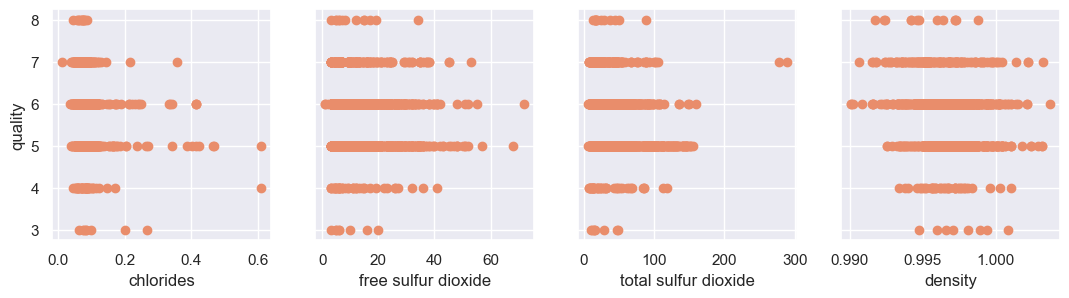

In [9]:
## plots the data from the first four features in side by side graphs
columns = df.columns.tolist()
x_features = columns[4:feature_count]
y_feature = columns[feature_count]

fig, ax=plt.subplots(1,4,  figsize=(13,3),  sharey=True)

for i in range(4):
    ax[i].scatter(x_train[:,(i+4)],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel(y_feature)
plt.show()

## Create a Neural Net Model

In [10]:
## Scale Data
abby = tf.keras.layers.Normalization()
abby.adapt(x_train)
x_train_norm = abby(x_train)

In [17]:
## Create Model
#pick number of layers, number of neurons, ReLu activation, desnse layers

Model = Sequential([
    Dense(units=11, activation='relu'),
    Dense(units=9, activation='relu'),
    Dense(units=3, activation='relu'),
    Dense(units=1, activation='linear')
])

In [18]:
# Compile the model
Model.compile(optimizer='adam', loss='mean_squared_error')

In [84]:
# Fit the model
history = Model.fit(x_train_norm, y_train, epochs=100, batch_size=1024, validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.3212 - val_loss: 0.3963
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3212 - val_loss: 0.3964
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3212 - val_loss: 0.3964
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3212 - val_loss: 0.3963
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3211 - val_loss: 0.3963
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3211 - val_loss: 0.3963
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3211 - val_loss: 0.3964
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.3211 - val_loss: 0.3965
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3211 - val_loss: 0.3965
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3211 - val_loss: 0.3964
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3211 - val_loss: 0.3963
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.3211 - val_lo

In [85]:
x_val_norm = abby(x_val)
y_prediction = Model.predict(x_val_norm)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [86]:
print(y_prediction[0:20])
print(y_val[0:20])

[[5.239751 ]
 [6.497063 ]
 [5.892196 ]
 [5.11537  ]
 [4.699967 ]
 [4.980448 ]
 [5.301419 ]
 [6.020816 ]
 [5.80746  ]
 [6.4688597]
 [5.7277584]
 [5.357345 ]
 [5.626106 ]
 [5.321765 ]
 [6.100523 ]
 [5.4679446]
 [6.4829164]
 [5.43186  ]
 [5.266525 ]
 [6.6823134]]
[5 6 7 5 5 5 3 6 5 7 6 5 5 5 6 5 7 5 5 7]


In [87]:
print(max(y_val))
print(max(y_prediction))

8
[7.5822625]


In [88]:
##y_prediction = (y_prediction/10)
y_prediction = np.round(y_prediction)

## Look at the Results

In [89]:
print(y_val.shape)
print(y_prediction.shape)

(320,)
(320, 1)


In [90]:
y_prediction = y_prediction.reshape(-1)

In [91]:
fig_newton = np.array([y_val,y_prediction])

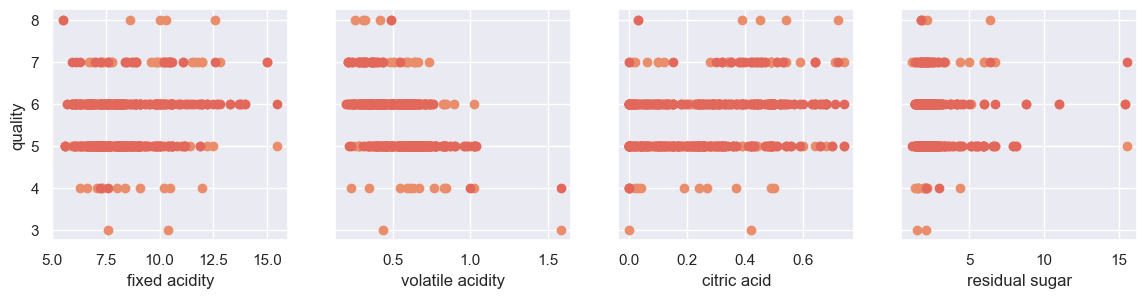

In [92]:
## plots the data from the first four features in side by side graphs
columns = df.columns.tolist()
x_features = columns[:feature_count]
y_feature = columns[feature_count]

fig, ax=plt.subplots(1,4,  figsize=(14,3),  sharey=True)

for i in range(4):
    ax[i].scatter(x_val[:,i],y_val)
    ax[i].scatter(x_val[:,i],y_prediction)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel(y_feature)
plt.show()

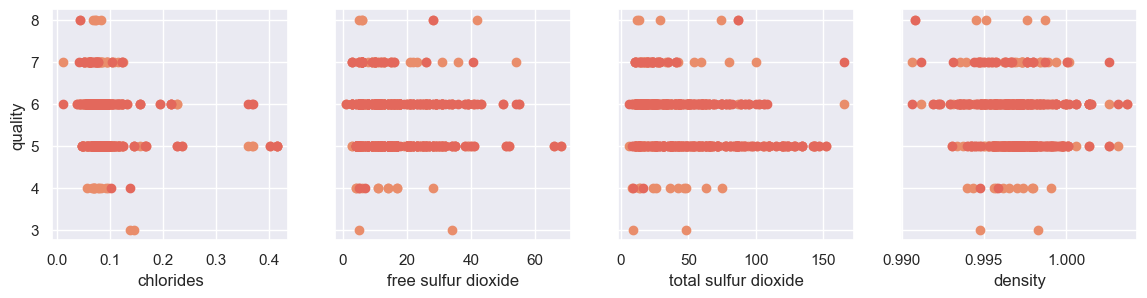

In [93]:
## plots the data from the first four features in side by side graphs
columns = df.columns.tolist()
x_features = columns[4:feature_count]
y_feature = columns[feature_count]

fig, ax=plt.subplots(1,4,  figsize=(14,3),  sharey=True)

for i in range(4):
    ax[i].scatter(x_val[:,i+4],y_val)
    ax[i].scatter(x_val[:,i+4],y_prediction)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel(y_feature)
plt.show()

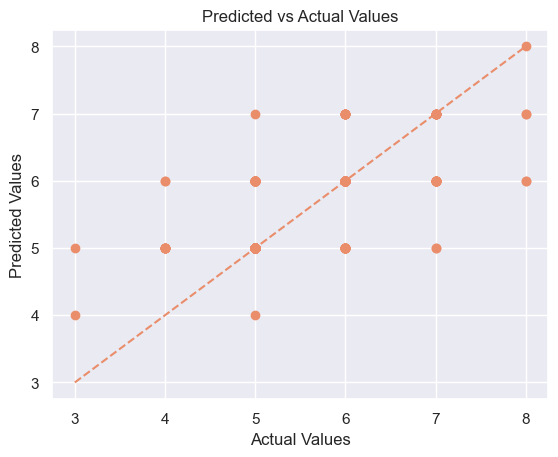

In [94]:
plt.scatter(y_val, y_prediction)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [95]:
cm = confusion_matrix(y_val, y_prediction)
class_labels = ["3","4","5","6","7","8"]

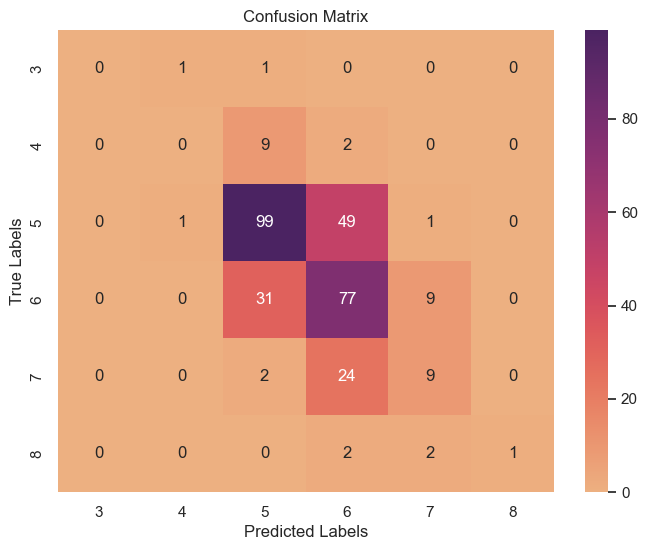

In [101]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [97]:
print(classification_report(y_val, y_prediction, target_names=class_labels, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.70      0.66      0.68       150
           6       0.50      0.66      0.57       117
           7       0.43      0.26      0.32        35
           8       1.00      0.20      0.33         5

    accuracy                           0.58       320
   macro avg       0.44      0.30      0.32       320
weighted avg       0.57      0.58      0.57       320



In [80]:
matches = y_val == y_prediction  # This returns a boolean array

# Calculate the percentage of matches (accuracy)
percentage_match = np.sum(matches) / len(y_val) * 100

print(f"Percentage of matching elements: {percentage_match}%")

Percentage of matching elements: 56.56250000000001%


## Conclusions
I"m comparing this model to my logrithmic regression model using the same data. I tried to control for lineal vs logrithmic as much as possible by using the same number of layers and neurons in both models. In that model, I selected the number 6 as the threshold for a binary classification ("quality" vs "not quality"). Here, each wine in the dataset is assigned a score on a scale from 1 - 10, with 10 being better quality.

In the beginnning the loss value was over 30, and the predictions didn't look anything like the actual values, but with a larger batch size (1024) and more training epoc, the loss started to decrease significantly. After ~200 training epochs, I reached a point where the loss was no longer decreasing significantly, at .3391, which resulted in an F1 score of 55%
After about 1500 more training epochs, I reached a  loss of .3202 and an F1 score of F1 = 57%. <br>
From there, increasing the number of training epochs didn't necesarrily improve the model's predictions. 

I'm not sure if the F1 score and the other elements in the Scikit Learn Classification Report are the best options for comparing the performance of the two models. The F1 score also seems limited as a way of describing the results of a linear model and dataset like this one. 
While the logistic model may have more instances of accuracy, this model still captures the relative positioning or general pettern in the data effectively. This is evident from the confusion matrix, where even incorrect predictions remain close to the true value, indicating strong alignment with the overall pttern in the data.

In addition, the logistic model is more forgiving. With a threshold of 0.5, the logistic model only needs to assign values broadly above or below this point to make correct classifications. This setup allows the model to achieve high accuracy even with less precise predictions, as long as the general separation between classes is maintained. There is also a much higher tolerance for approximation; the logistic model can yield correct classifications even if the probability it assigns is not very close to 1 or 0, as long as it’s on the right side of 0.5. This tolerance makes it easier to meet classification metrics since the exact value isn’t as critical as it might be in other models.

Because of this, I chose to convert the results of my linear regression model to a binary classification and run the same classification report on the predictions. The resulting F1 score, below, is identical 73%

In [102]:
y_val_binary = np.where(y_val >= 6, 1, 0)
y_prediction_binary = np.where(y_prediction >= 6,1,0)

In [105]:
binary_class_labels = ["not quality", "quality wine"]
print(classification_report(y_val_binary, y_prediction_binary, target_names=binary_class_labels, zero_division=0))

              precision    recall  f1-score   support

 not quality       0.77      0.68      0.72       163
quality wine       0.70      0.79      0.74       157

    accuracy                           0.73       320
   macro avg       0.74      0.74      0.73       320
weighted avg       0.74      0.73      0.73       320

